<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/%5BComputer_Vision%5D_Hands_On_2_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-On #2**: Computer Vision

Creation by Supasate Vorathammathorn (Kom) & Patchara Opaspilai (Petch)

AI Lecture - Computer Vision

Date: January 31, 2024

## Before you start

Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. IF you are using google colab and face any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

#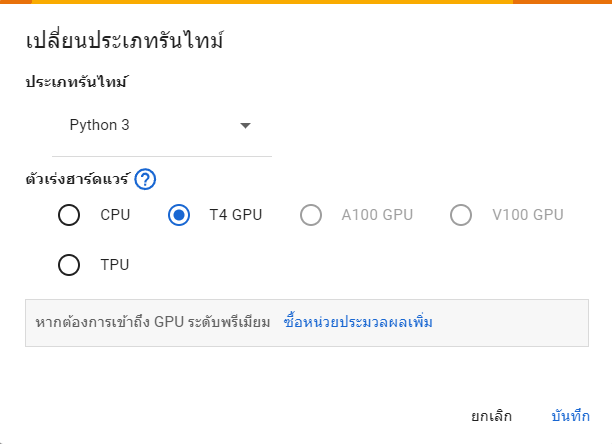

In [ ]:
!nvidia-smi

Wed Jan 31 09:22:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install YOLOv8

## Object detection

In [ ]:
# Pip install method

!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# 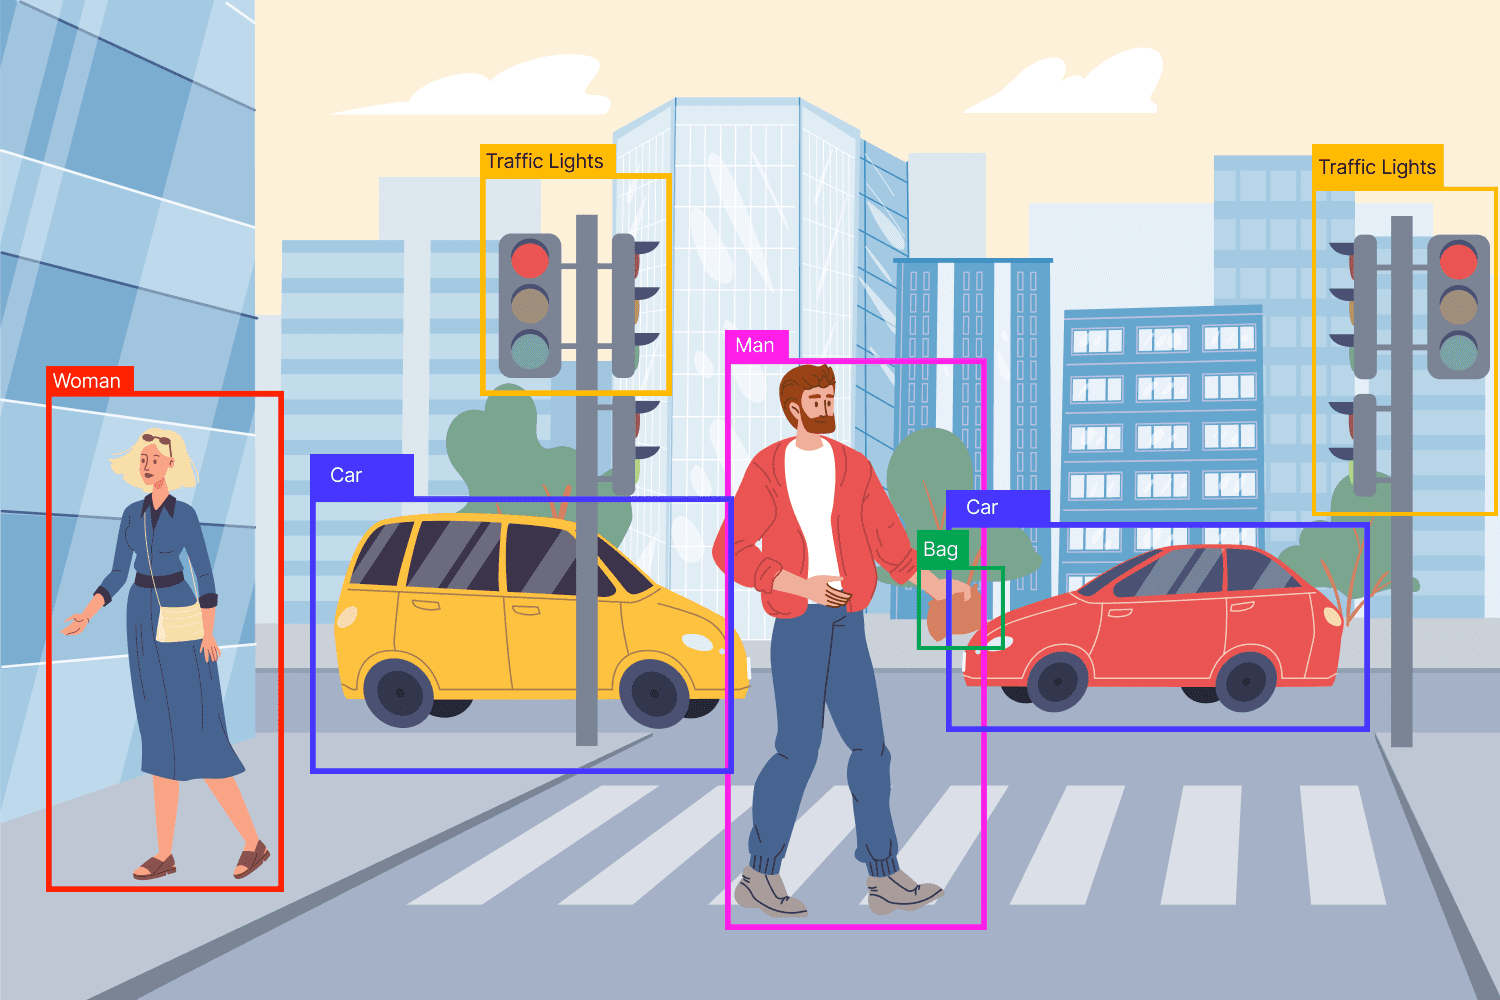

Step 1: Download our datasets

In [ ]:
# Donwload example dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1QV2KDQGSm7BOR1rL8V7")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(4).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-players-detection-4 in yolov8:: 100%|██████████| 522/522 [00:00<00:00, 2384.14it/s]


Step 2: Change train,val and test directory in data.ymal

# 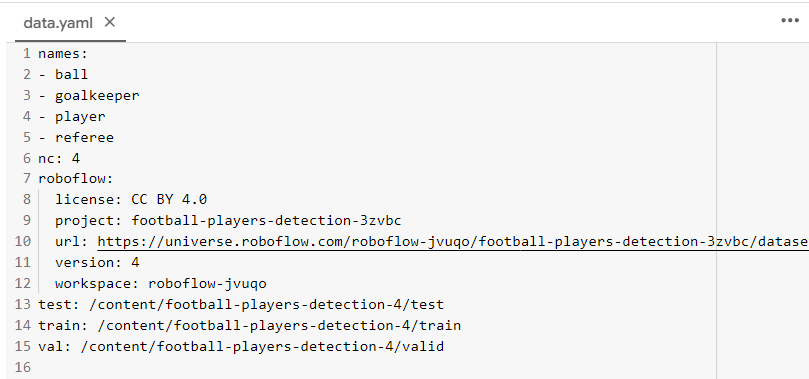

Step 3: Train out dataset with yolov8 model

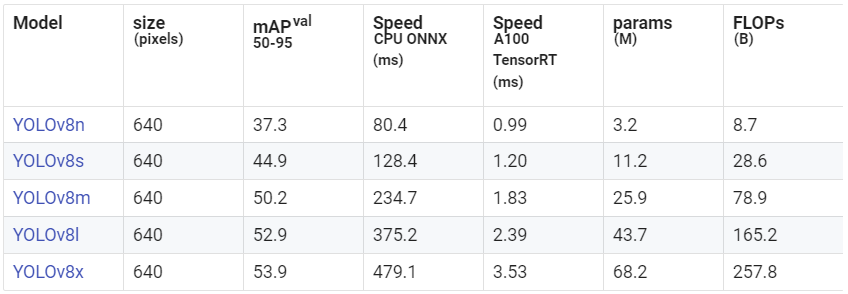

Note: In ultralytic, you can choose other model. For instance, yolov3, yolov5, yolov6 and RT-DETR for objection detection

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/football-players-detection-4/data.yaml', epochs=100, imgsz=640,batch=-1)

100%|██████████| 6.23M/6.23M [00:00<00:00, 157MB/s]


Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/football-players-detection-4/data.yaml, epochs=100, time=None, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 40.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/football-players-detection-4/train/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 1650.54it/s]

train: New cache created: /content/football-players-detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/football-players-detection-4/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 842.59it/s]

val: New cache created: /content/football-players-detection-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        11G      1.964      4.491      1.008       2578        640: 100%|██████████| 3/3 [00:07<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.52s/it]

                   all         38        905          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.1G      2.005      4.496      1.001       2694        640: 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         38        905          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.7G      1.944        4.5     0.9922       2433        640: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         38        905          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.7G      1.774      4.048      0.912       2337        640: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         38        905   8.31e-05    0.00281   4.21e-05   1.68e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.6G      1.849      3.134     0.8817       2357        640: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         38        905    0.00258     0.0131    0.00135   0.000519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.1G      1.809      2.162     0.8617       2528        640: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         38        905     0.0164     0.0754      0.056     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.7G      1.739      1.662     0.8583       2395        640: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         38        905      0.022      0.106     0.0663     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.7G      1.669      1.469      0.855       2252        640: 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         38        905     0.0214      0.116     0.0662     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.7G      1.608      1.411     0.8497       2321        640: 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         38        905     0.0251      0.151     0.0604     0.0256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.7G      1.594      1.338      0.851       2362        640: 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         38        905     0.0344      0.202      0.106     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.1G       1.55      1.266     0.8472       2537        640: 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         38        905     0.0408      0.225      0.138     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.9G      1.526      1.227     0.8414       2289        640: 100%|██████████| 3/3 [00:05<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         38        905     0.0432      0.221      0.132      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.7G      1.482      1.179     0.8461       2448        640: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         38        905     0.0471      0.229      0.146     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.1G      1.476      1.144     0.8438       2503        640: 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         38        905     0.0508       0.24      0.154     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.1G      1.487      1.142     0.8371       2232        640: 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         38        905     0.0537      0.265      0.188      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.7G      1.504      1.134     0.8406       2294        640: 100%|██████████| 3/3 [00:05<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         38        905     0.0554       0.32      0.194      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.1G      1.516      1.119     0.8355       2433        640: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         38        905     0.0569      0.347      0.153     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.9G      1.439      1.074     0.8338       2533        640: 100%|██████████| 3/3 [00:05<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         38        905     0.0644      0.419      0.193     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.6G      1.531      1.109     0.8359       2212        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         38        905     0.0694      0.454      0.225       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G       1.51      1.068     0.8396       2699        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         38        905     0.0646      0.446      0.224      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.1G      1.476      1.059     0.8365       2619        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         38        905     0.0599      0.426      0.218      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.6G      1.417      1.022     0.8328       2430        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         38        905     0.0585      0.485      0.234      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        11G       1.38       1.01     0.8242       2670        640: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         38        905     0.0573      0.533      0.237      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.6G      1.332     0.9822     0.8284       2275        640: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         38        905     0.0598       0.52      0.231      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.7G      1.354     0.9897     0.8243       2504        640: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         38        905     0.0582      0.555      0.269       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.6G      1.283     0.9431     0.8204       2610        640: 100%|██████████| 3/3 [00:06<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         38        905     0.0593      0.595      0.274      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.7G      1.296      0.933     0.8229       2418        640: 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         38        905     0.0661      0.617      0.309      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.7G      1.363     0.9291     0.8303       2334        640: 100%|██████████| 3/3 [00:06<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         38        905      0.837      0.263      0.333      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.6G      1.389     0.9245     0.8268       2622        640: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         38        905      0.445      0.562      0.379      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G      1.379     0.9148     0.8193       2481        640: 100%|██████████| 3/3 [00:05<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         38        905      0.064      0.622      0.415      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.7G      1.285     0.8713     0.8248       2231        640: 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         38        905      0.857      0.345      0.427      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.1G      1.308     0.8513      0.821       2366        640: 100%|██████████| 3/3 [00:07<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         38        905      0.954      0.193      0.449      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.7G      1.301     0.8617     0.8226       2286        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         38        905      0.981      0.169      0.455      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.6G       1.26     0.8164     0.8216       2316        640: 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         38        905       0.84      0.224      0.426      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        11G      1.289     0.8227     0.8194       2471        640: 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         38        905      0.976      0.236      0.458      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.1G      1.243     0.8027     0.8177       2675        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         38        905      0.906      0.301      0.438      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.7G      1.236     0.7897      0.817       2519        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         38        905      0.905      0.341      0.463      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        11G      1.325     0.8078     0.8242       2337        640: 100%|██████████| 3/3 [00:06<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         38        905      0.906      0.313      0.468      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.8G      1.257     0.7762     0.8187       2429        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         38        905      0.846      0.277      0.466      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.6G      1.233     0.7586     0.8131       2730        640: 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         38        905      0.897      0.241      0.419      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.6G      1.256     0.7747     0.8154       2534        640: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         38        905      0.943      0.264      0.442       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.2G      1.226     0.7422     0.8158       2664        640: 100%|██████████| 3/3 [00:05<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         38        905      0.946      0.293      0.481      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.9G      1.233     0.7743     0.8174       2346        640: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         38        905      0.918      0.367      0.521      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.6G      1.273     0.7629     0.8178       2471        640: 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         38        905      0.846      0.378       0.46      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.6G      1.284     0.7872     0.8201       2365        640: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         38        905      0.897      0.336      0.496        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        11G      1.321     0.7892     0.8215       2417        640: 100%|██████████| 3/3 [00:07<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         38        905      0.893      0.311      0.405      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.6G      1.366     0.7905     0.8278       2522        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         38        905      0.898      0.388       0.51      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.1G      1.392     0.7915     0.8205       2405        640: 100%|██████████| 3/3 [00:05<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         38        905      0.878      0.479      0.568      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.7G      1.423     0.8072     0.8227       2317        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         38        905      0.874      0.494       0.58      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.6G       1.35     0.7709      0.822       2536        640: 100%|██████████| 3/3 [00:05<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         38        905      0.869      0.487      0.589       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.5G      1.301     0.7521     0.8217       2459        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         38        905      0.868      0.493      0.603      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.7G      1.358     0.7531     0.8197       2653        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         38        905      0.865      0.516      0.614      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.6G      1.301     0.7352     0.8178       2635        640: 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         38        905      0.867       0.53      0.592      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.6G      1.272     0.7091     0.8152       2469        640: 100%|██████████| 3/3 [00:07<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         38        905       0.88      0.522      0.601      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        11G      1.208       0.69      0.815       2490        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         38        905        0.9      0.501        0.6      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.6G      1.229     0.6932     0.8121       2677        640: 100%|██████████| 3/3 [00:05<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         38        905      0.885      0.507      0.616      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.6G      1.212     0.6921     0.8121       2862        640: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         38        905       0.87      0.513      0.612       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.1G       1.21     0.6849      0.812       2605        640: 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         38        905      0.874      0.547      0.614      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.1G       1.17     0.6673     0.8084       2041        640: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         38        905      0.879      0.542      0.611      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.6G      1.134     0.6502     0.8032       2340        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         38        905      0.895      0.523      0.626      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.6G      1.131     0.6519     0.8106       2195        640: 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         38        905      0.876      0.467      0.604      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        11G      1.173     0.6536      0.808       2275        640: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         38        905      0.879      0.524      0.626      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.1G      1.205     0.6673     0.8092       2644        640: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         38        905      0.877       0.47      0.593      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.6G      1.147     0.6565     0.8071       2672        640: 100%|██████████| 3/3 [00:06<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         38        905      0.864      0.447      0.574      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.1G      1.221     0.6681     0.8107       2476        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         38        905      0.828       0.47      0.595      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        11G      1.206     0.6774     0.8093       2329        640: 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         38        905      0.823      0.541      0.615      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.7G      1.163      0.654     0.8046       2491        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         38        905      0.847      0.574      0.639      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.2G      1.155     0.6441     0.8111       2436        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         38        905      0.856      0.572      0.644      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.5G      1.184     0.6551     0.8101       2601        640: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         38        905      0.878      0.554      0.635      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.7G      1.196     0.6599     0.8052       2742        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         38        905      0.845      0.503      0.605      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.1G      1.128       0.63     0.8065       2539        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         38        905      0.801       0.51      0.611      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.1G      1.173     0.6406     0.8066       2596        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         38        905      0.841       0.52      0.622      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.1G      1.153     0.6335     0.8073       2438        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         38        905       0.86      0.538       0.62       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        11G      1.159     0.6316     0.8088       2370        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         38        905      0.871      0.537      0.623      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.1G      1.182     0.6392     0.8063       2734        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         38        905      0.842      0.604      0.652      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.7G      1.099     0.6161      0.805       2211        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         38        905      0.852      0.577      0.642      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.6G      1.108     0.6161     0.8072       2268        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         38        905      0.883      0.579      0.647      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.7G      1.138     0.6138     0.8064       2467        640: 100%|██████████| 3/3 [00:05<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         38        905      0.858      0.584      0.653       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        11G      1.096     0.6023     0.8036       2412        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         38        905      0.861      0.572      0.658      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.7G      1.111     0.6086     0.8061       2505        640: 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         38        905      0.907      0.584      0.665      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.7G      1.122     0.6049     0.8017       2351        640: 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         38        905      0.876      0.588      0.667      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.1G       1.12     0.6016     0.8041       2545        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         38        905      0.913      0.575      0.666      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.9G      1.081     0.5909     0.7993       2350        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         38        905      0.873      0.568      0.657      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.7G      1.092      0.591     0.8046       2410        640: 100%|██████████| 3/3 [00:07<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         38        905      0.845      0.579      0.649      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.1G      1.093     0.5954     0.8017       2610        640: 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         38        905       0.86      0.575      0.653      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.1G      1.114     0.5982     0.8044       2297        640: 100%|██████████| 3/3 [00:06<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         38        905      0.875      0.579      0.662      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.6G      1.089     0.5882     0.7959       2577        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         38        905      0.885      0.582      0.652       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.6G      1.093     0.5907      0.801       2522        640: 100%|██████████| 3/3 [00:06<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         38        905      0.848      0.568      0.646      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.5G      1.067     0.5842     0.8042       2294        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         38        905      0.872       0.58      0.654      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.7G      1.108     0.5977     0.8053       2384        640: 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         38        905      0.872      0.599      0.664      0.427


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.47G      1.047     0.6551     0.8018       1371        640: 100%|██████████| 3/3 [00:13<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all         38        905      0.898      0.586      0.662      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.76G      1.035     0.6064      0.806       1402        640: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         38        905      0.874       0.58       0.66      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.47G      1.041     0.5952      0.806       1367        640: 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         38        905      0.882      0.583      0.657      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.45G      1.022      0.582     0.8027       1406        640: 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         38        905      0.881      0.586      0.657      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.47G     0.9972     0.5728     0.7986       1368        640: 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         38        905      0.898      0.587      0.661      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.45G     0.9959     0.5752     0.8022       1383        640: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         38        905      0.913       0.57      0.655      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.47G      1.001     0.5788     0.8051       1377        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         38        905       0.87      0.575      0.654      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.47G     0.9791     0.5599     0.8033       1383        640: 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         38        905      0.845      0.601      0.649      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.47G     0.9795     0.5575     0.8008       1376        640: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         38        905      0.856      0.586      0.649       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.45G     0.9741     0.5514     0.8009       1392        640: 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         38        905      0.865      0.598      0.659      0.412



100 epochs completed in 0.204 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


                   all         38        905      0.871      0.599      0.664      0.426
                  ball         38         35          1          0      0.045     0.0108
            goalkeeper         38         27      0.893      0.778      0.919      0.599
                player         38        754      0.894      0.943      0.969      0.662
               referee         38         89      0.697      0.674      0.723      0.431
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


Note: You can check further result in train folder.

Step 4: Validate our best model

In [ ]:
# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val(data='/content/football-players-detection-4/data.yaml',split='val')  # no arguments needed, dataset and settings remembered
print('map50-95',metrics.box.map)    # map50-95
print('map50',metrics.box.map50)  # map50
print('map75',metrics.box.map75)  # map75
print(metrics.box.maps)

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/football-players-detection-4/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]


                   all         38        905      0.869      0.599      0.664      0.426
                  ball         38         35          1          0     0.0448     0.0107
            goalkeeper         38         27      0.888      0.778      0.918      0.593
                player         38        754      0.891      0.943      0.968      0.669
               referee         38         89      0.696      0.674      0.723      0.431
Speed: 0.2ms preprocess, 24.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
map50-95 0.42587278721024086
map50 0.6637313283705017
map75 0.47898716530391333
[   0.010716     0.59278     0.66895     0.43105]


Step 5: Test our model with unseen data


image 1/1 /content/football-players-detection-4/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 98.8ms
Speed: 2.0ms preprocess, 98.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


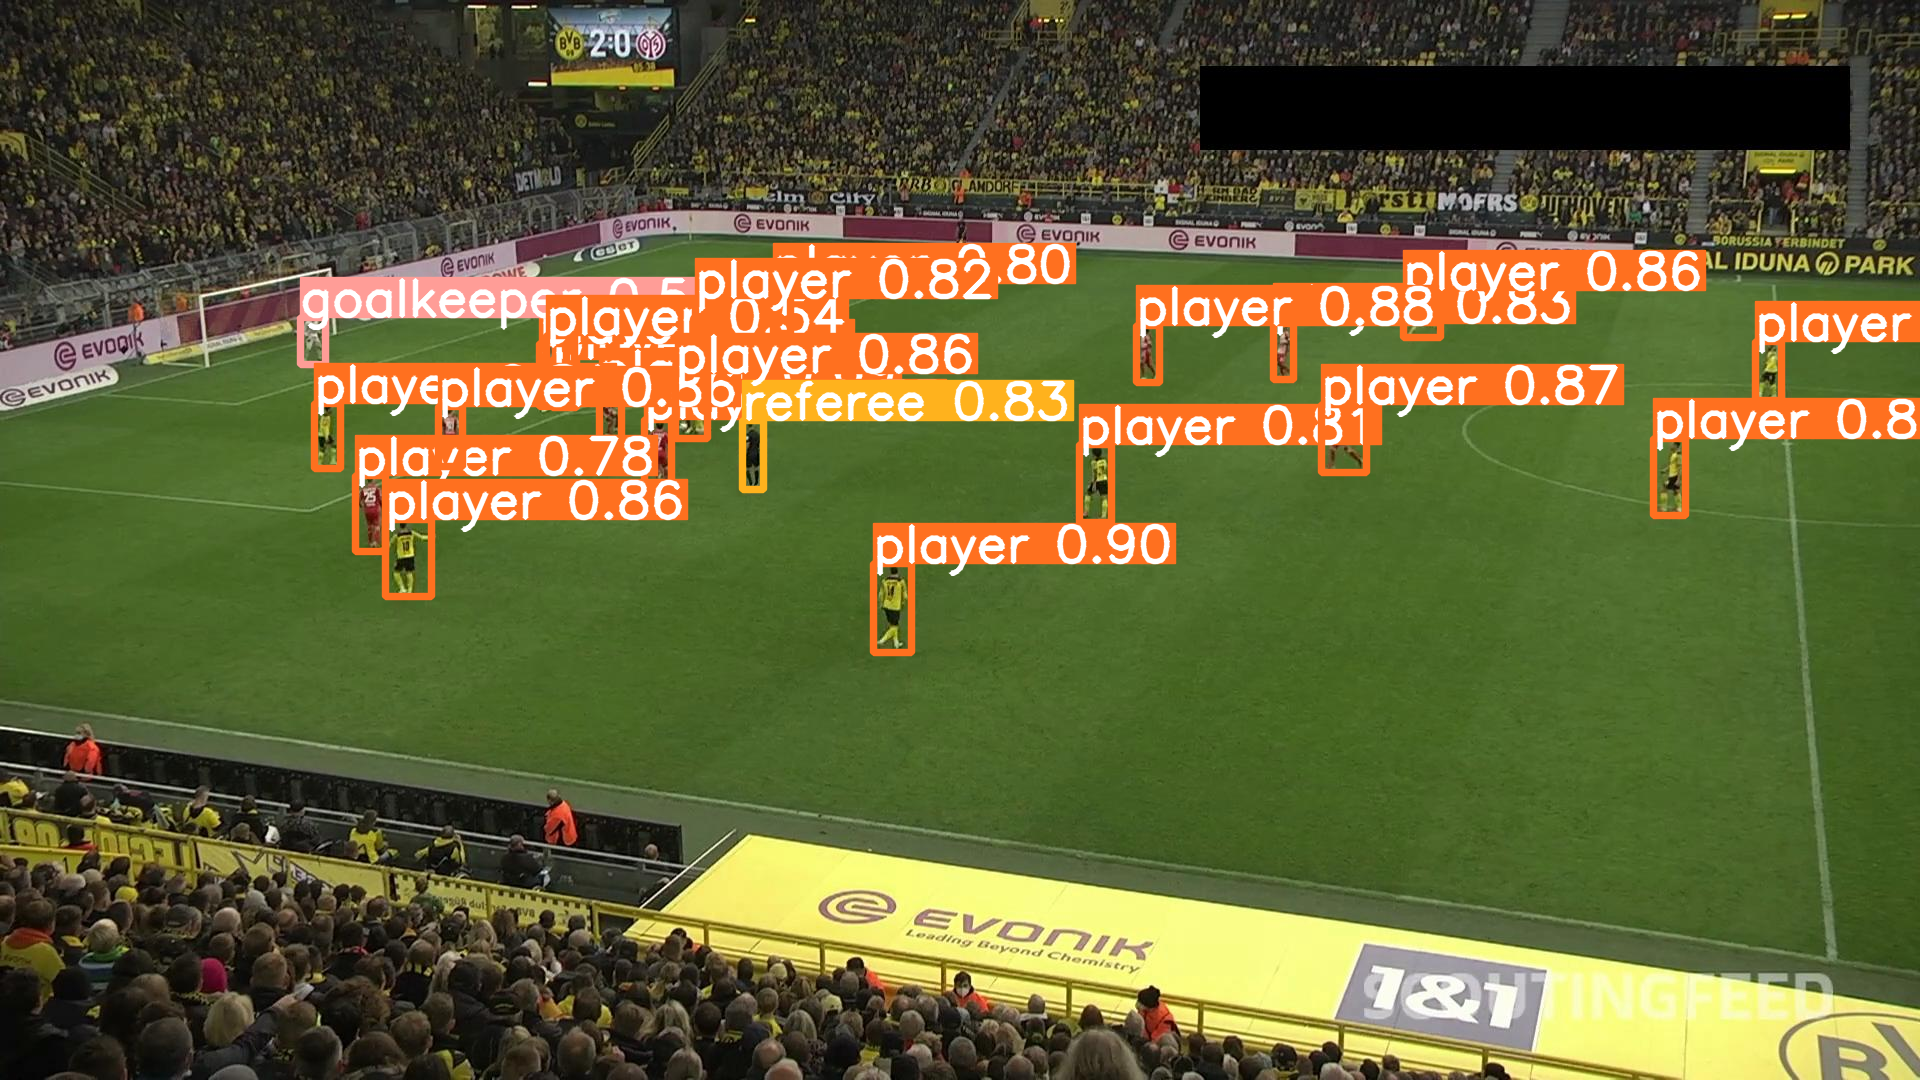

In [ ]:
from google.colab.patches import cv2_imshow
import os

model = YOLO('/content/runs/detect/train/weights/best.pt')
path = '/content/football-players-detection-4/test/images/'
image_list = os.listdir(path)

results = model(path+image_list[0])

annotated_frame = results[0].plot()

cv2_imshow(annotated_frame)

In [ ]:
model.predict(path, save=True, imgsz=640, conf=0.25)


image 1/13 /content/football-players-detection-4/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 20 players, 3 referees, 17.0ms
image 2/13 /content/football-players-detection-4/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 22 players, 2 referees, 15.1ms
image 3/13 /content/football-players-detection-4/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 15.5ms
image 4/13 /content/football-players-detection-4/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 19 players, 1 referee, 20.9ms
image 5/13 /content/football-players-detection-4/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 13.8ms
image 6/13 /content/football-players-detection-4/test/images/573e61_1_9_png.rf.e82af77d907cdc12dccbd6857f53b9b1.jpg: 384x640 18 players, 2 referees, 11.7ms
image 7/13

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}
 obb: None
 orig_img: array([[[ 97, 114,  87],
         [ 98, 115,  88],
         [102, 116,  92],
         ...,
         [255, 252, 172],
         [255, 254, 174],
         [255, 255, 175]],
 
        [[100, 116,  92],
         [101, 117,  93],
         [101, 117,  93],
         ...,
         [255, 250, 170],
         [255, 250, 172],
         [255, 252, 172]],
 
        [[102, 120,  97],
         [101, 119,  96],
         [101, 118,  97],
         ...,
         [228, 218, 140],
         [228, 218, 141],
         [228, 218, 140]],
 
        ...,
 
        [[ 39,  59,  60],
         [ 43,  63,  64],
         [ 42,  61,  64],
         ...,
         [ 59,  56,  51],
         [ 61,  58,  53],
         [ 62,  59,  54]],
 
        [[ 35,  55,  56],
         [ 42,  62,  63],
         [ 42,  

## Object instance segmentation

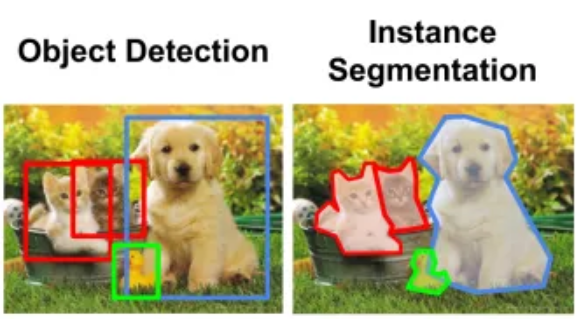

In [ ]:
## Donwload example dataset ##

#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1QV2KDQGSm7BOR1rL8V7")
project = rf.workspace("segmentation-9q8ob").project("car-parts-llqro")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Car-parts-1 in yolov8:: 100%|██████████| 3522/3522 [00:00<00:00, 6688.46it/s]


In [ ]:
## Change train,val and test directory in data.ymal ##

In [ ]:
import os, shutil

shutil.rmtree("/content/runs/segment")

In [ ]:
## Train segmentation model ##

from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/Car-parts-1/data.yaml', epochs=10, imgsz=640,batch=-1)

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Car-parts-1/data.yaml, epochs=10, time=None, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/Car-parts-1/train/labels.cache... 1228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1228/1228 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Car-parts-1/valid/labels.cache... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0004375), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.84G      1.422      3.131      3.462      1.597        103        640: 100%|██████████| 44/44 [00:33<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


                   all        351       1706      0.844     0.0525      0.154      0.103      0.841     0.0512      0.146     0.0947

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.36G      1.108      2.068      2.093      1.313        119        640: 100%|██████████| 44/44 [00:28<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]


                   all        351       1706      0.476      0.393      0.381      0.251      0.476      0.387       0.37      0.232

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10       5.4G      1.001      1.785      1.625      1.205        103        640: 100%|██████████| 44/44 [00:26<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


                   all        351       1706      0.534      0.548      0.514      0.345      0.522      0.527      0.497      0.317

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.35G     0.9616      1.662      1.409      1.164        108        640: 100%|██████████| 44/44 [00:26<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.20s/it]


                   all        351       1706      0.626      0.593      0.616      0.406      0.608       0.59      0.601      0.379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.37G     0.8994      1.527       1.26      1.118        117        640: 100%|██████████| 44/44 [00:27<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


                   all        351       1706      0.624      0.668      0.695      0.516      0.632       0.67      0.697      0.495

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10       5.4G     0.8664      1.423      1.132      1.094        111        640: 100%|██████████| 44/44 [00:31<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]

                   all        351       1706      0.683      0.722      0.763      0.562      0.686      0.724      0.766      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.41G     0.8047      1.307     0.9987      1.056        115        640: 100%|██████████| 44/44 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        351       1706      0.843      0.839      0.893      0.703      0.841      0.832      0.884      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10       5.4G     0.7641      1.229     0.9032      1.027        118        640: 100%|██████████| 44/44 [00:27<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        351       1706      0.872      0.823      0.898      0.719      0.876      0.827      0.897      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.39G     0.7288      1.158     0.8434      1.013        110        640: 100%|██████████| 44/44 [00:32<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        351       1706      0.868      0.874       0.92      0.748      0.871      0.876      0.923      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.42G     0.6925      1.097     0.7863     0.9874        114        640: 100%|██████████| 44/44 [00:26<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]


                   all        351       1706      0.868      0.898      0.927      0.772      0.873      0.902       0.93       0.75

10 epochs completed in 0.104 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259819 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.89s/it]


                   all        351       1706      0.868      0.898      0.927      0.772      0.873      0.903       0.93      0.751
           back_bumper        351         86      0.881       0.86      0.909       0.71      0.905      0.883       0.93      0.663
             back_door        351        164      0.847      0.829      0.913      0.781      0.848      0.829      0.915      0.756
            back_glass        351        103      0.764      0.874      0.893      0.742      0.764      0.874      0.893      0.692
            back_light        351        236      0.855      0.775      0.866      0.637      0.875      0.792      0.884      0.615
          front_bumper        351        181      0.938      0.978      0.974       0.85      0.938      0.978      0.974      0.836
            front_door        351        171       0.75      0.942      0.927      0.801      0.751      0.942      0.927      0.801
           front_glass        351        190      0.958      0.966   

In [ ]:
## Validate segmentation model ##

# Load a model
model = YOLO('/content/runs/segment/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val(data='/content/Car-parts-1/data.yaml',split='val')  # no arguments needed, dataset and settings remembered
print(metrics.seg.map)    # map50-95(M)
print(metrics.seg.map50)  # map50(M)
print(metrics.seg.map75)  # map75(M)
print(metrics.seg.maps)

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259819 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/Car-parts-1/valid/labels.cache... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.21s/it]


                   all        351       1706      0.868      0.898      0.927      0.773      0.873      0.902       0.93       0.75
           back_bumper        351         86      0.881      0.859      0.909      0.711      0.905      0.882       0.93      0.659
             back_door        351        164      0.849      0.829      0.914      0.781      0.849      0.824      0.915      0.755
            back_glass        351        103      0.764      0.874      0.894      0.744      0.765      0.874      0.893      0.691
            back_light        351        236      0.856      0.775      0.866      0.637      0.876      0.792      0.884      0.615
          front_bumper        351        181      0.938      0.978      0.974       0.85      0.938      0.978      0.974      0.834
            front_door        351        171      0.751      0.942      0.927      0.803      0.751      0.942      0.927      0.801
           front_glass        351        190      0.958      0.966   


image 1/1 /content/Car-parts-1/test/images/train380_jpg.rf.e199dda78bbc131bafaed2349627fae2.jpg: 640x640 1 back_bumper, 1 back_door, 1 back_glass, 2 back_lights, 1 front_door, 34.7ms
Speed: 3.0ms preprocess, 34.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


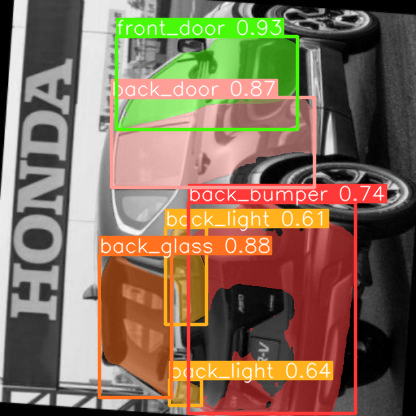

In [ ]:
## predict ##

model = YOLO('/content/runs/segment/train/weights/best.pt')
path = '/content/Car-parts-1/test/images/'
image_list = os.listdir(path)

results = model(path+image_list[0],conf = 0.5)

annotated_frame = results[0].plot()

cv2_imshow(annotated_frame)

front_door


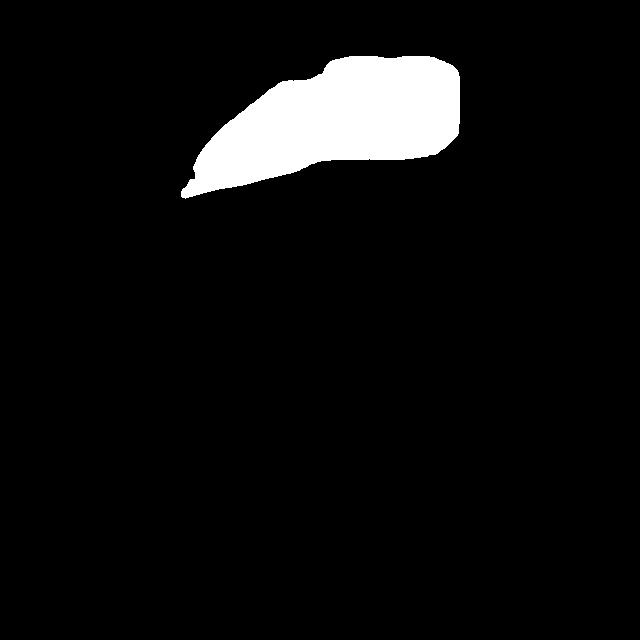

back_glass


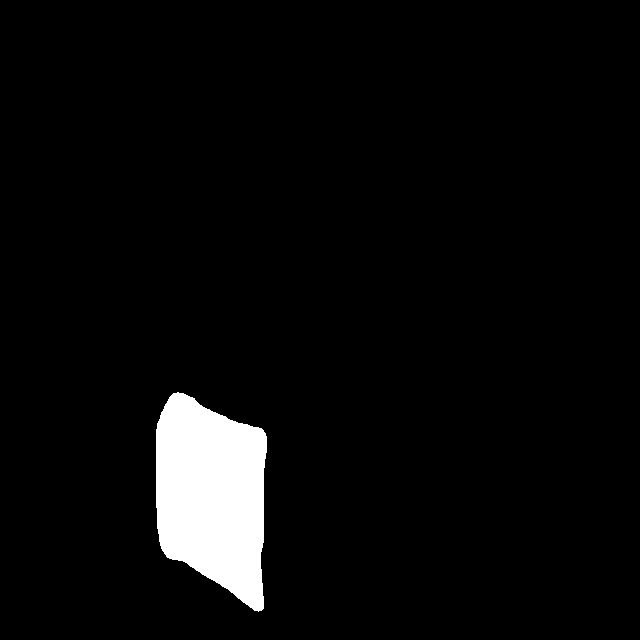

back_door


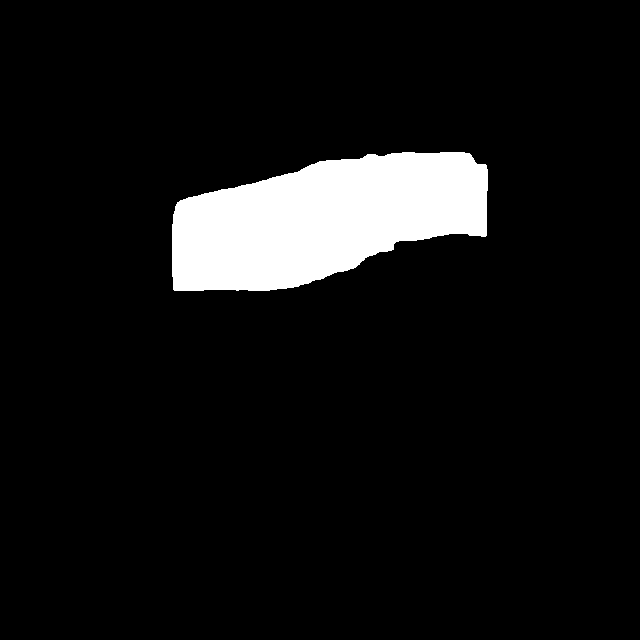

back_bumper


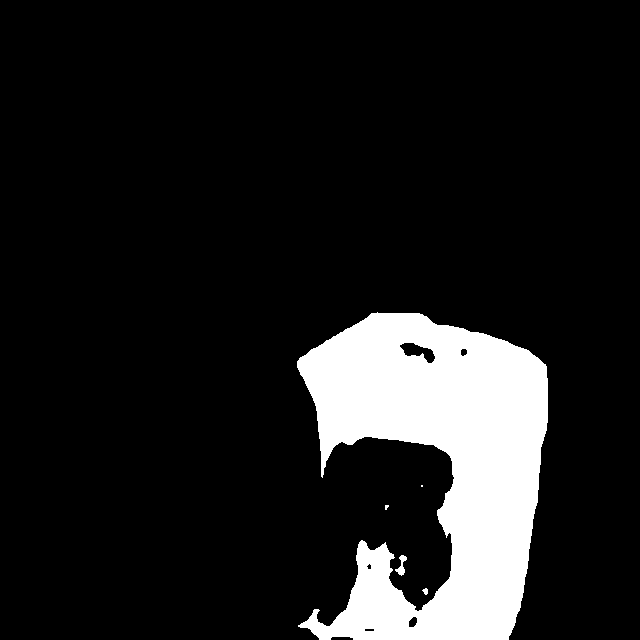

back_light


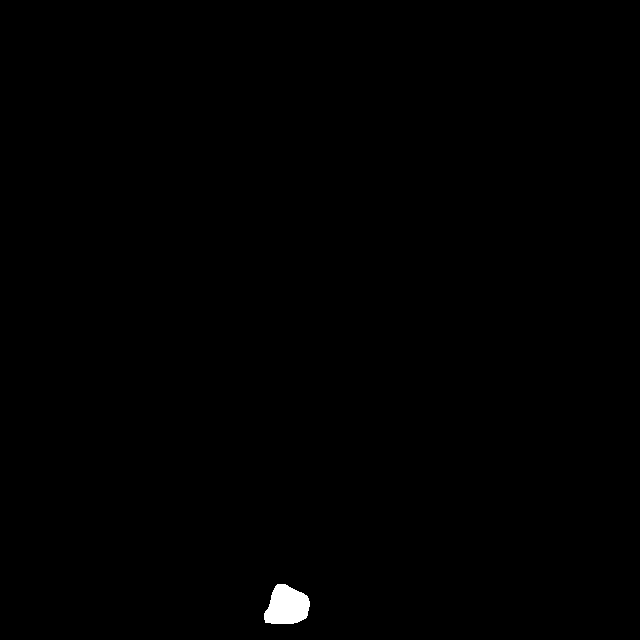

back_light


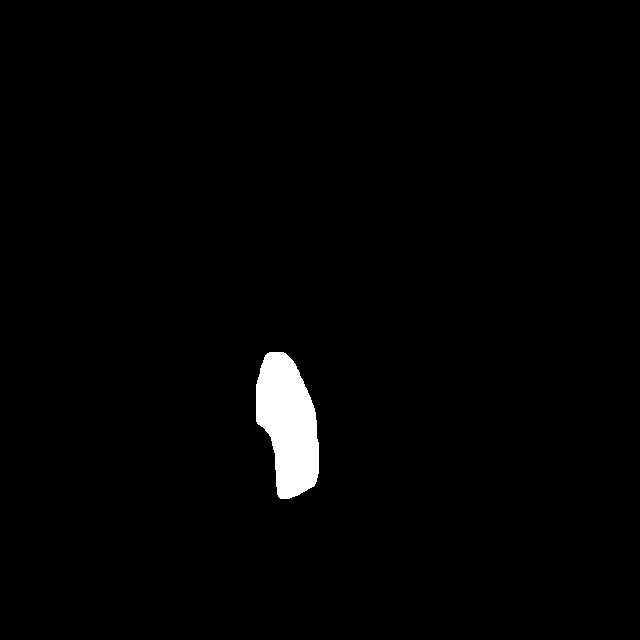

In [ ]:
for result in results:
  for j,mask in enumerate(result.masks.data):
    print(result.names[int(result.boxes.cls[j])])
    mask = mask.cpu().numpy() * 255
    cv2_imshow(mask)

In [ ]:
## predict_2 ##
model.predict(path, save=True, imgsz=640, conf=0.25)


image 1/176 /content/Car-parts-1/test/images/car25_jpg.rf.1d9e8ee78ebe2c1c191f4d1ba69d52f8.jpg: 640x640 1 back_bumper, 2 back_lights, 39.7ms
image 2/176 /content/Car-parts-1/test/images/car42_jpg.rf.440f4f40505698b215af87e5b3d858b4.jpg: 640x640 2 back_bumpers, 1 back_glass, 2 back_lights, 32.7ms
image 3/176 /content/Car-parts-1/test/images/car4_jpg.rf.97ee4f7fdf1827911679ec8af348e37d.jpg: 640x640 1 front_bumper, 1 front_glass, 2 front_lights, 1 hood, 26.1ms
image 4/176 /content/Car-parts-1/test/images/car87_jpg.rf.93afc8bf6a093ece0dcf4dd699d134b6.jpg: 640x640 1 back_bumper, 1 back_door, 1 back_glass, 2 back_lights, 1 front_door, 24.8ms
image 5/176 /content/Car-parts-1/test/images/car88_jpg.rf.2a466b4487ea22f63ca92c85e3553d99.jpg: 640x640 1 back_bumper, 1 back_glass, 3 back_lights, 24.1ms
image 6/176 /content/Car-parts-1/test/images/new_10_png_jpg.rf.a1fff27bcbd31ff59f05217418a1ae5a.jpg: 640x640 1 back_door, 1 front_bumper, 1 front_door, 1 front_glass, 3 front_lights, 1 hood, 25.6ms
im

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'back_bumper', 1: 'back_door', 2: 'back_glass', 3: 'back_light', 4: 'front_bumper', 5: 'front_door', 6: 'front_glass', 7: 'front_light', 8: 'hood'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
       

Note: Sometime, segmentaton datasets are hard to find and label.

## Segment Anything Model (SAM)

We can use SAM for tranform detection result to segmentation result.

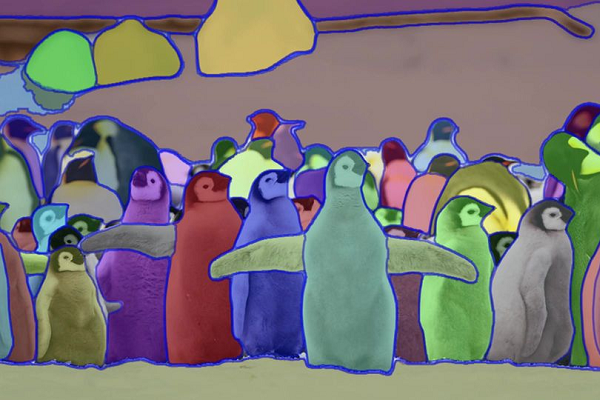


image 1/1 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60, 1 61, 1 62, 1 63, 1 64, 1 65, 1 66, 1 67, 1 68, 1 69, 1 70, 1 71, 1 72, 1 73, 10817.6ms
Speed: 10.9ms preprocess, 10817.6ms inference, 5.9ms postprocess per image at shape (1, 3, 1024, 1024)


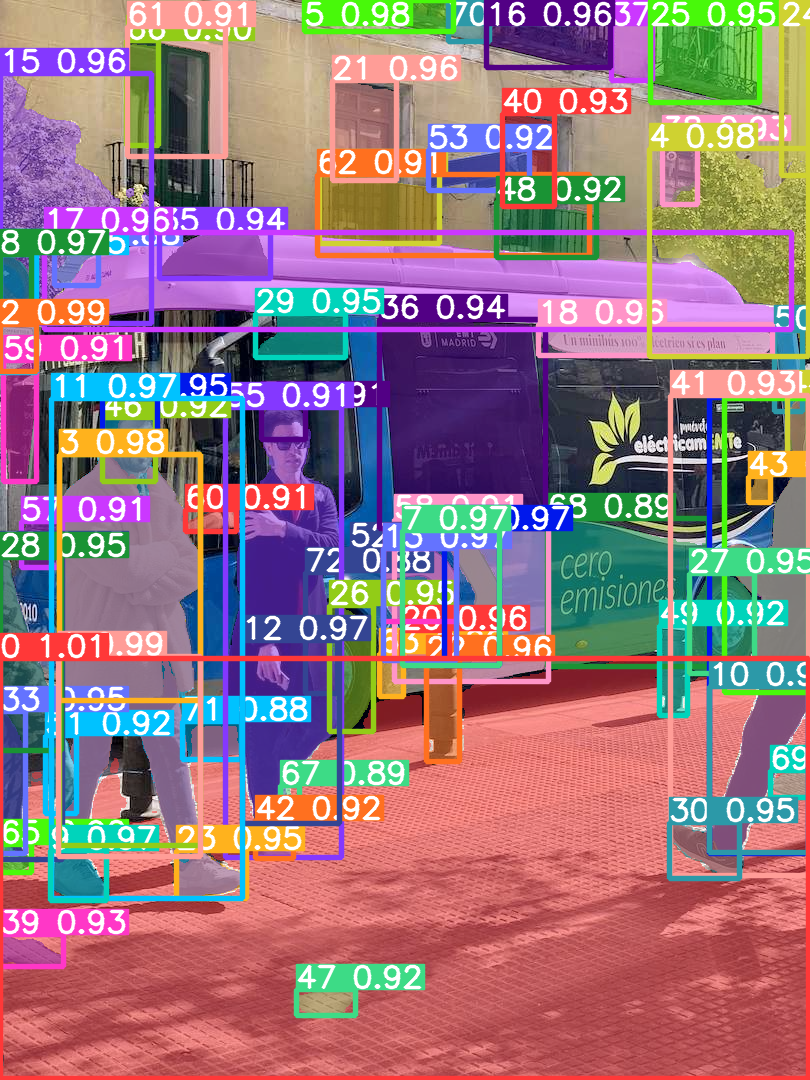

In [ ]:
from ultralytics import SAM

image = '/usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg'
# Load a model
model = SAM('sam_b.pt')

# Run inference with bboxes prompt
results = model(image)
annotated_frame = results[0].plot()
cv2_imshow(annotated_frame)

Use object detection model to find bounding boxes


image 1/1 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 29.6ms
Speed: 3.4ms preprocess, 29.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


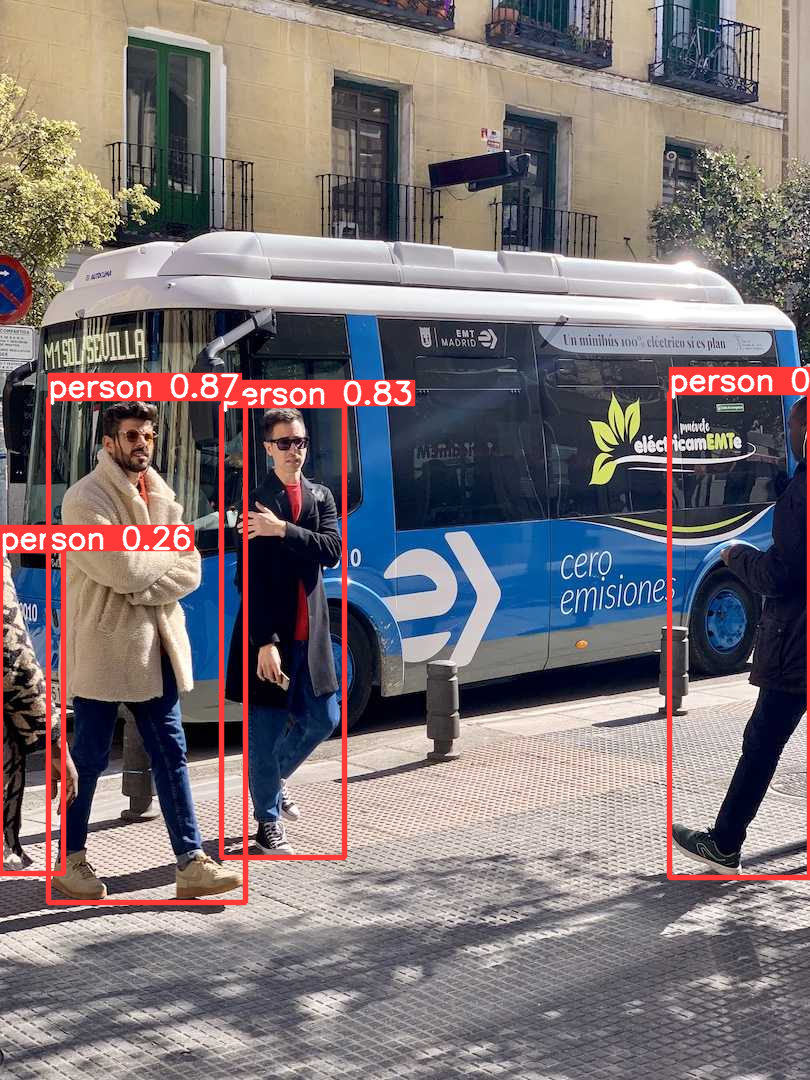

[[48.55049133300781,
  398.55218505859375,
  245.34555053710938,
  902.7026977539062],
 [669.472900390625, 392.1860656738281, 809.7201538085938, 877.0354614257812],
 [221.5172882080078, 405.79864501953125, 344.9706115722656, 857.53662109375],
 [0.0, 550.525146484375, 63.00693130493164, 873.44287109375]]

In [ ]:
model = YOLO('yolov8n.pt')
results = model(image,classes=0)

annotated_frame = results[0].plot()
cv2_imshow(annotated_frame)

Boxes = []
for result in results:
  boxes = result.boxes
  for i in range(len(boxes)):
    bbox = boxes.xyxy.tolist()[i]
    Boxes.append(bbox)
Boxes

Use those box in SAM to segment only thing that model focus


image 1/1 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 1024x1024 466.2ms
Speed: 5.4ms preprocess, 466.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)


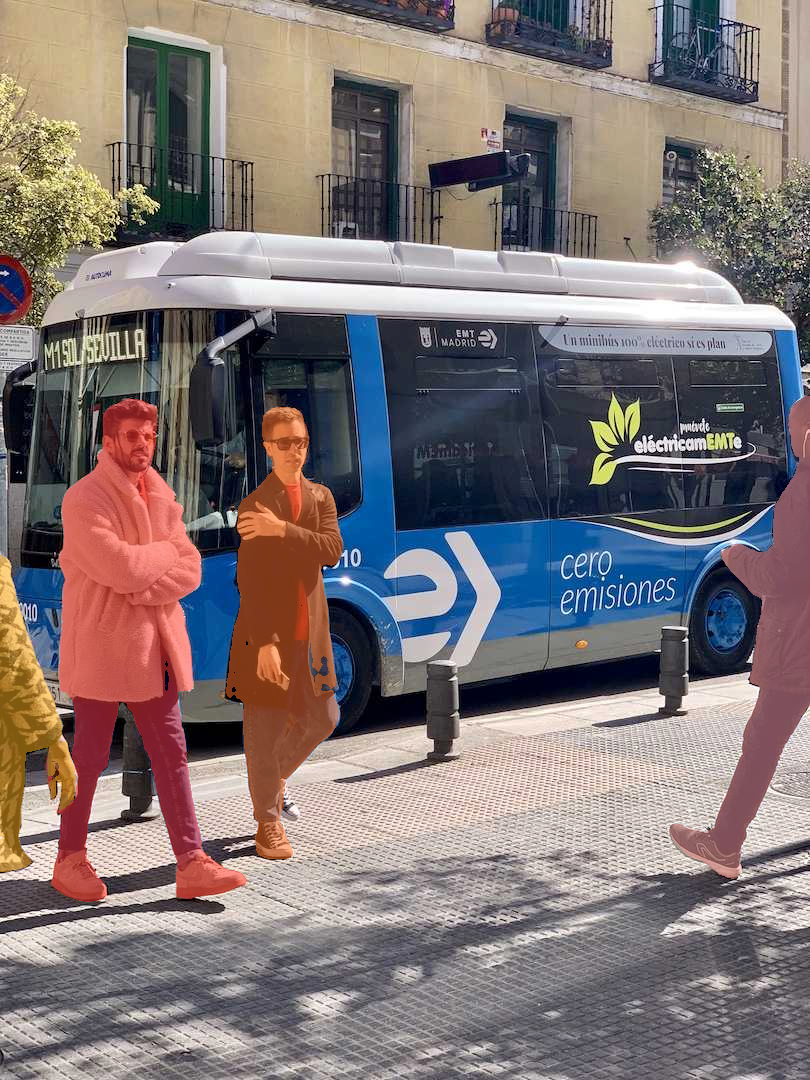

In [ ]:
# Load a model
model = SAM('sam_b.pt')

# Run inference with bboxes prompt
results = model(image, bboxes=Boxes)
annotated_frame = results[0].plot()
cv2_imshow(annotated_frame)